<a href="https://colab.research.google.com/github/Afreen-Kazi-1/MediScribe-Doctor-s-Prescription-Recognizer/blob/main/Yet_another_copy_of_ML_miniProj(Final_ig).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mamun1113_doctors_handwritten_prescription_bd_dataset_path = kagglehub.dataset_download('mamun1113/doctors-handwritten-prescription-bd-dataset')

print('Data source import complete.')

100%|██████████| 19.1M/19.1M [00:00<00:00, 54.6MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import kagglehub, os

# Reconfirm the KaggleHub download path
dataset_path = kagglehub.dataset_download('mamun1113/doctors-handwritten-prescription-bd-dataset')
print("KaggleHub path:", dataset_path)

# List all contents deeply (3 levels)
for root, dirs, files in os.walk(dataset_path):
    print("📁", root)
    if files:
        print("   Files:", files[:5])

Using Colab cache for faster access to the 'doctors-handwritten-prescription-bd-dataset' dataset.
KaggleHub path: /kaggle/input/doctors-handwritten-prescription-bd-dataset
📁 /kaggle/input/doctors-handwritten-prescription-bd-dataset
📁 /kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset
📁 /kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation
   Files: ['validation_labels.csv']
📁 /kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words
   Files: ['641.png', '173.png', '491.png', '718.png', '709.png']
📁 /kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training
   Files: ['training_labels.csv']
📁 /kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words
   Files: ['2664.png', '2539.png', 

In [ ]:
train_dir = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Training/training_words")
train_csv = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv")

val_dir = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Validation/validation_words")
val_csv = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv")

test_dir = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Testing/testing_words")
test_csv = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv")

In [ ]:
import pandas as pd

train_labels = pd.read_csv(train_csv)
print("Columns:", train_labels.columns)
print("Total samples:", len(train_labels))
print(train_labels.head())

Columns: Index(['IMAGE', 'MEDICINE_NAME', 'GENERIC_NAME'], dtype='object')
Total samples: 3120
   IMAGE MEDICINE_NAME GENERIC_NAME
0  0.png         Aceta  Paracetamol
1  1.png         Aceta  Paracetamol
2  2.png         Aceta  Paracetamol
3  3.png         Aceta  Paracetamol
4  4.png         Aceta  Paracetamol


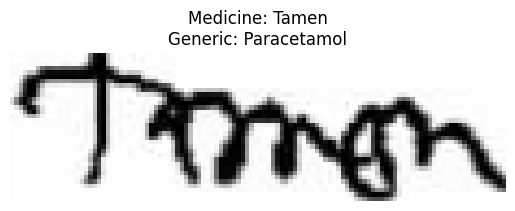

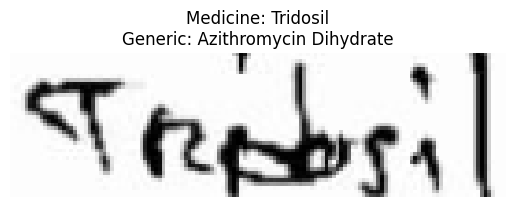

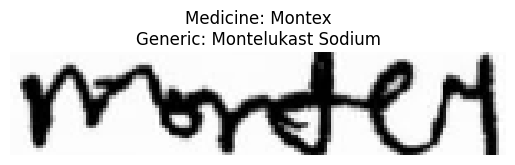

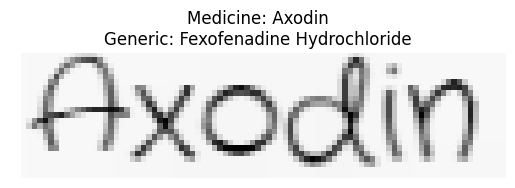

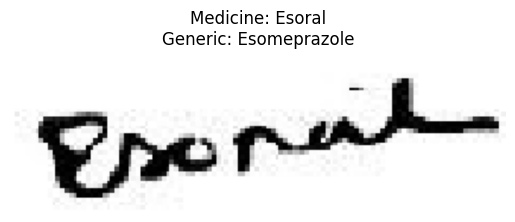

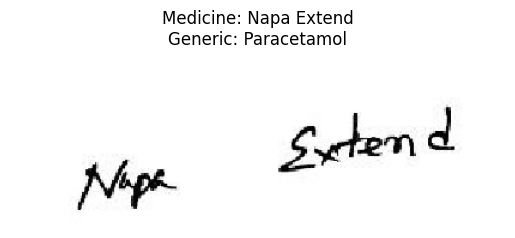

In [ ]:
import cv2, matplotlib.pyplot as plt, random, os

for _, row in train_labels.sample(6, random_state=42).iterrows():
    img_path = os.path.join(train_dir, row['IMAGE'])  # use IMAGE column
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Medicine: {row['MEDICINE_NAME']}\nGeneric: {row['GENERIC_NAME']}")
    plt.axis('off')
    plt.show()
    #Dataset consist of drug names only 1 or 2 words (not sentences)...it is word-level classfication

In [ ]:
missing = [f for f in train_labels['IMAGE'] if not os.path.exists(os.path.join(train_dir, f))]
print("Missing images:", len(missing))

Missing images: 0


/tmp/ipython-input-3587693987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='viridis')


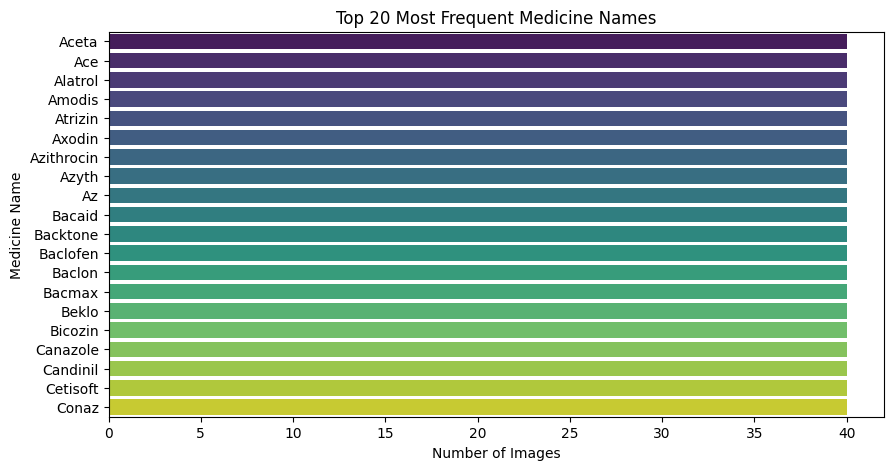

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = train_labels['MEDICINE_NAME'].value_counts().head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title("Top 20 Most Frequent Medicine Names")
plt.xlabel("Number of Images")
plt.ylabel("Medicine Name")
plt.show()

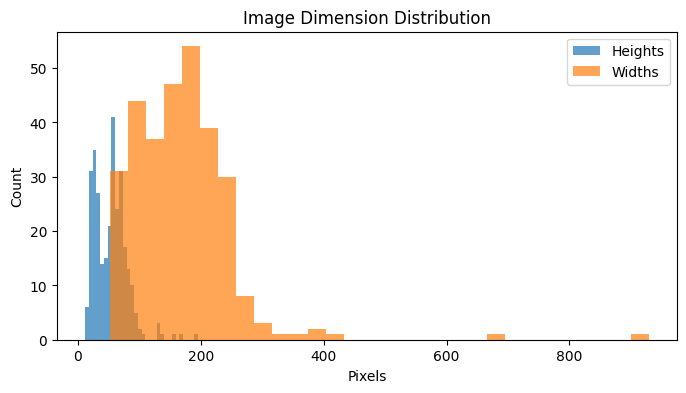

In [ ]:
import numpy as np
import cv2, os, random

heights, widths = [], []
for img_name in random.sample(os.listdir(train_dir), min(300, len(os.listdir(train_dir)))):
    img = cv2.imread(os.path.join(train_dir, img_name))
    if img is None: continue
    h, w = img.shape[:2]
    heights.append(h)
    widths.append(w)

plt.figure(figsize=(8,4))
plt.hist(heights, bins=30, alpha=0.7, label='Heights')
plt.hist(widths, bins=30, alpha=0.7, label='Widths')
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.legend()
plt.show()

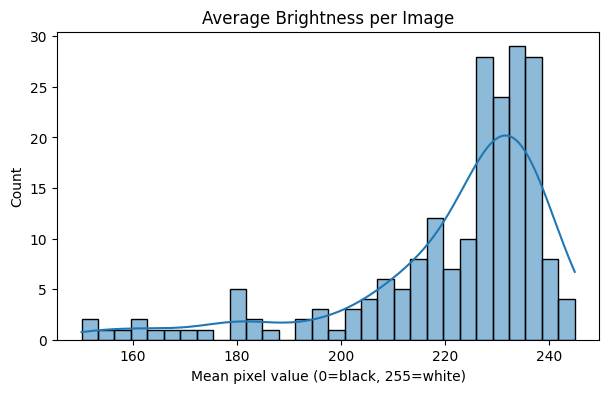

In [ ]:
import numpy as np
gray_means = []

for img_name in random.sample(os.listdir(train_dir), min(200, len(os.listdir(train_dir)))):
    img = cv2.imread(os.path.join(train_dir, img_name), cv2.IMREAD_GRAYSCALE)
    gray_means.append(np.mean(img))

plt.figure(figsize=(7,4))
sns.histplot(gray_means, bins=30, kde=True)
plt.title("Average Brightness per Image")
plt.xlabel("Mean pixel value (0=black, 255=white)")
plt.ylabel("Count")
plt.show()
#Tells you if some images are too light/dark → you’ll know whether normalization or thresholding is needed.
#Most images have mean pixel values between 210–240, meaning they are light gray to white backgrounds.
#A small number have mean brightness around 150–180 → darker scans or thicker ink. brightness is uneven across samples

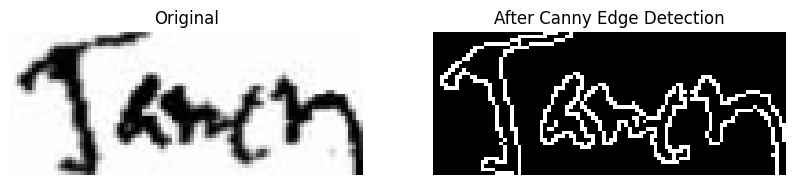

In [ ]:
import matplotlib.pyplot as plt
import cv2, random

sample = random.choice(os.listdir(train_dir))
img_path = os.path.join(train_dir, sample)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 100, 200)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("After Canny Edge Detection")
plt.axis('off')

plt.show()
#The Canny image clearly emphasizes the medicine’s shape and strokes.

/tmp/ipython-input-1599936156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='word_length', data=train_labels, palette='cool')


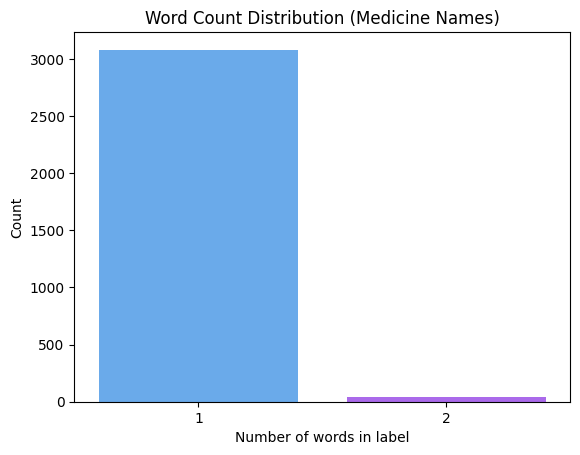

In [ ]:
train_labels['word_length'] = train_labels['MEDICINE_NAME'].apply(lambda x: len(x.split()))
import seaborn as sns
sns.countplot(x='word_length', data=train_labels, palette='cool')
plt.title("Word Count Distribution (Medicine Names)")
plt.xlabel("Number of words in label")
plt.ylabel("Count")
plt.show()

In [ ]:
sample_map = train_labels.sample(10)[['MEDICINE_NAME', 'GENERIC_NAME']]
print(sample_map)

     MEDICINE_NAME                GENERIC_NAME
2701         Ritch  Fexofenadine Hydrochloride
2394       Nizoder        Ketoconazole (Cream)
444       Baclofen                    Baclofen
1522       Ketocon      Ketoconazole (Shampoo)
679       Canazole                 Fluconazole
2046       Montair          Montelukast Sodium
1293        Filmet               Metronidazole
1105        Etizin    Cetirizine Hydrochloride
1961       Metsina               Metronidazole
2252        Nexcap                Esomeprazole


In [ ]:
import cv2
import numpy as np
import os
from tqdm import tqdm

# --- KaggleHub dataset base ---
dataset_path = "/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1"
train_input_dir = os.path.join(dataset_path, "Doctor’s Handwritten Prescription BD dataset/Training/training_words")
train_output_dir = "/kaggle/working/processed_training"
os.makedirs(train_output_dir, exist_ok=True)

print("Input dir exists:", os.path.exists(train_input_dir))
print("Example files:", os.listdir(train_input_dir)[:5])

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None

    img = cv2.GaussianBlur(img, (3, 3), 0)
    edges = cv2.Canny(img, 100, 200)
    edges = cv2.resize(edges, (224, 224))
    norm_img = edges / 255.0
    return norm_img

for fname in tqdm(os.listdir(train_input_dir)):
    src_path = os.path.join(train_input_dir, fname)
    dst_path = os.path.join(train_output_dir, fname)
    processed = preprocess_image(src_path)
    if processed is not None:
        cv2.imwrite(dst_path, (processed * 255).astype(np.uint8))

print("✅ Preprocessing complete.")
print("Processed images saved in:", train_output_dir)


Input dir exists: True
Example files: ['1572.png', '2403.png', '1862.png', '518.png', '2453.png']


100%|██████████| 3120/3120 [00:03<00:00, 793.89it/s]

✅ Preprocessing complete.
Processed images saved in: /kaggle/working/processed_training


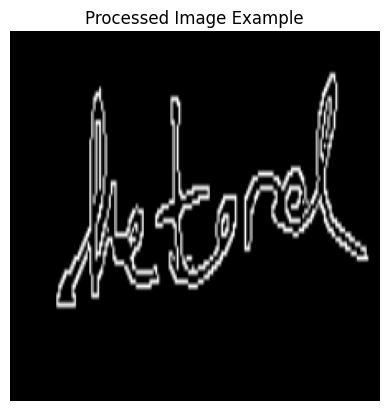

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread(os.path.join(train_output_dir, os.listdir(train_output_dir)[0]), cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Processed Image Example")
plt.axis('off')
plt.show()

In [ ]:
# !zip -r processed_training.zip /kaggle/working/processed_training
# from google.colab import files
# files.download("processed_training.zip")

In [ ]:
cross = train_labels.groupby(['GENERIC_NAME'])['MEDICINE_NAME'].nunique().sort_values(ascending=False)
cross.head(15)
#See if multiple brand names map to the same generic.

,MEDICINE_NAME
GENERIC_NAME,
Esomeprazole,10
Fexofenadine Hydrochloride,9
Montelukast Sodium,9
Baclofen,8
Fluconazole,7
Azithromycin Dihydrate,6
Metronidazole,6
Paracetamol,6
Cetirizine Hydrochloride,5


Text(0.5, 1.0, 'Aspect ratio (w/h)')

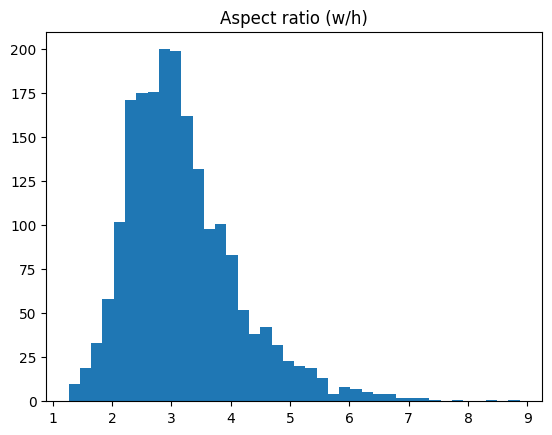

In [ ]:
ratios=[]
for f in os.listdir(train_input_dir)[:2000]:
    img=cv2.imread(os.path.join(train_input_dir,f),cv2.IMREAD_GRAYSCALE)
    if img is not None:
        h,w=img.shape
        ratios.append(w/h)
plt.hist(ratios, bins=40); plt.title("Aspect ratio (w/h)")

Text(0.5, 1.0, 'Laplacian variance (blur measure)')

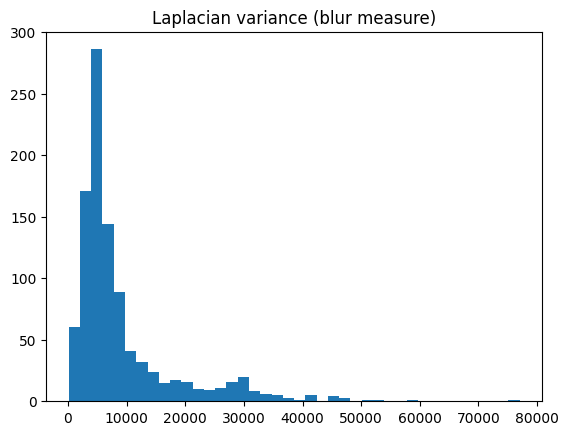

In [ ]:
def blur_score(p):
    i=cv2.imread(p,0)
    return cv2.Laplacian(i, cv2.CV_64F).var() if i is not None else np.nan

scores=[blur_score(os.path.join(train_input_dir,f)) for f in os.listdir(train_input_dir)[:1000]]
plt.hist(scores,bins=40); plt.title("Laplacian variance (blur measure)")

Text(0.5, 1.0, 'Brightness vs Contrast')

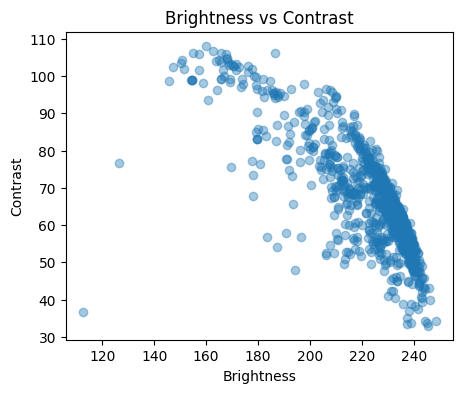

In [ ]:
br,ct=[],[]
for f in os.listdir(train_input_dir)[:1000]:
    img=cv2.imread(os.path.join(train_input_dir,f),0)
    if img is not None:
        br.append(np.mean(img)); ct.append(np.std(img))
plt.figure(figsize=(5,4))
plt.scatter(br, ct, alpha=0.4)
plt.xlabel("Brightness"); plt.ylabel("Contrast")
plt.title("Brightness vs Contrast")

Text(0.5, 1.0, 'Ink density distribution')

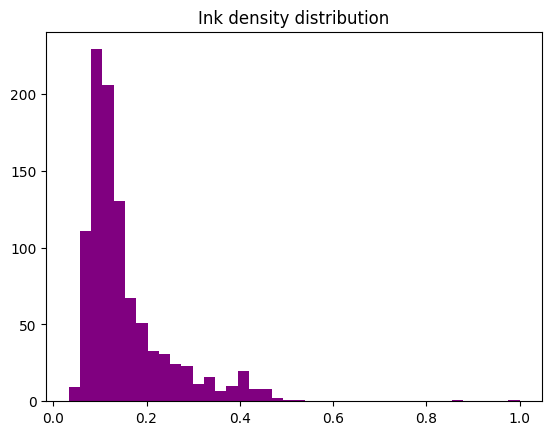

In [ ]:
dens=[]
for f in os.listdir(train_input_dir)[:1000]:
    img=cv2.imread(os.path.join(train_input_dir,f),0)
    if img is not None:
        dens.append((img < 200).mean())
plt.hist(dens,bins=40,color='purple'); plt.title("Ink density distribution")

CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
import kagglehub
mamun1113_doctors_handwritten_prescription_bd_dataset_path = kagglehub.dataset_download('mamun1113/doctors-handwritten-prescription-bd-dataset')


Using Colab cache for faster access to the 'doctors-handwritten-prescription-bd-dataset' dataset.


In [ ]:
import os
import pandas as pd

BASE_PATH = "/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1/Doctor’s Handwritten Prescription BD dataset"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 50

# Load CSVs
train_csv = pd.read_csv(os.path.join(BASE_PATH, "Training", "training_labels.csv"))
val_csv   = pd.read_csv(os.path.join(BASE_PATH, "Validation", "validation_labels.csv"))
test_csv  = pd.read_csv(os.path.join(BASE_PATH, "Testing", "testing_labels.csv"))

# Load image paths to csv
train_csv["path"] = train_csv["IMAGE"].apply(lambda x: os.path.join(BASE_PATH, "Training", "training_words", x))
val_csv["path"]   = val_csv["IMAGE"].apply(lambda x: os.path.join(BASE_PATH, "Validation", "validation_words", x))
test_csv["path"]  = test_csv["IMAGE"].apply(lambda x: os.path.join(BASE_PATH, "Testing", "testing_words", x))

# Classes are the medicine names
class_names = sorted(train_csv["MEDICINE_NAME"].unique())
num_classes = len(class_names)
class_to_idx = {name: i for i, name in enumerate(class_names)}
idx_to_class = {i: name for i, name in enumerate(class_names)}

# Encode labels
train_csv["label"] = train_csv["MEDICINE_NAME"].map(class_to_idx)
val_csv["label"]   = val_csv["MEDICINE_NAME"].map(class_to_idx)
test_csv["label"]  = test_csv["MEDICINE_NAME"].map(class_to_idx)

print("Number of classes:", num_classes)
print("Example classes:", class_names[:10])


Number of classes: 78
Example classes: ['Ace', 'Aceta', 'Alatrol', 'Amodis', 'Atrizin', 'Axodin', 'Az', 'Azithrocin', 'Azyth', 'Bacaid']


In [ ]:
train_csv.head()

,IMAGE,MEDICINE_NAME,GENERIC_NAME,path,label
0,0.png,Aceta,Paracetamol,/root/.cache/kagglehub/datasets/mamun1113/doct...,1
1,1.png,Aceta,Paracetamol,/root/.cache/kagglehub/datasets/mamun1113/doct...,1
2,2.png,Aceta,Paracetamol,/root/.cache/kagglehub/datasets/mamun1113/doct...,1
3,3.png,Aceta,Paracetamol,/root/.cache/kagglehub/datasets/mamun1113/doct...,1
4,4.png,Aceta,Paracetamol,/root/.cache/kagglehub/datasets/mamun1113/doct...,1


In [ ]:
# Create the TF dataset

def decode_img(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)   # ensure RGB
    img = tf.image.resize(img, IMG_SIZE)
    img = img / 255.0
    return img, tf.one_hot(label, depth=num_classes)

def make_dataset(df, training=True):
    paths = df["path"].values
    labels = df["label"].values
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(decode_img, num_parallel_calls=tf.data.AUTOTUNE)
    if training:
        ds = ds.shuffle(1024)
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_dataset(train_csv, training=True)
val_ds   = make_dataset(val_csv, training=False)
test_ds  = make_dataset(test_csv, training=False)


Building the CNN model on VCG with Transfer Learning

In [ ]:
from tensorflow.keras import layers, models, optimizers

def build_custom_cnn(input_shape, num_classes, dropout=0.5):

    inputs = layers.Input(shape=input_shape)

    # -------------------------
    # BLOCK 1  (3 layers)
    # -------------------------
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    # -------------------------
    # BLOCK 2  (3 layers)
    # -------------------------
    x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    # -------------------------
    #BLOCK 3  (4 layers)
    # -------------------------
    x = layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    # -------------------------
    #BLOCK 4  (3 layers)
    # -------------------------
    x = layers.Conv2D(256, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3,3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    # -------------------------
    # CLASSIFIER (3 layers)
    # -------------------------
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name="custom_16_layer_cnn")
    return model

# Create and compile model
model = build_custom_cnn((*IMG_SIZE, 3), num_classes)
model.compile(optimizer=optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "custom_16_layer_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 78)             │        20,046 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,536,366 (21.12 MB)

 Trainable params: 5,535,406 (21.12 MB)

 Non-trainable params: 960 (3.75 KB)

Training the Model

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.0356 - loss: 4.7879 - val_accuracy: 0.0128 - val_loss: 4.9993
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.0589 - loss: 4.1083 - val_accuracy: 0.0128 - val_loss: 6.6648
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.1276 - loss: 3.8249 - val_accuracy: 0.0128 - val_loss: 8.4893
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.1927 - loss: 3.4051 - val_accuracy: 0.0282 - val_loss: 5.8245
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.2672 - loss: 3.0320 - val_accuracy: 0.1192 - val_loss: 3.9509
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3534 - loss: 2.5618 - val_accuracy: 0.3833 - val_loss: 2.7594
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.5061 - loss: 1.9499 - val_accuracy: 0.5269 - val_loss: 2.0557
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5959 - loss: 1.5181 - val_accuracy: 0.5756 -

Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6573 - loss: 1.6829
Test accuracy: 0.6064102649688721


Feature Maps

In [ ]:
# img_path = random.choice(os.listdir(test_dir))
# img = cv2.imread(os.path.join(test_dir, img_path))  # read as color (3-channels)
# img = cv2.resize(img, (128, 128)) / 255.0           # match model input size
# input_img = np.expand_dims(img, axis=0)             # shape (1,128,128,3)

Image loaded successfully.
Model expects: (None, 128, 128, 3)
Input shape provided: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step


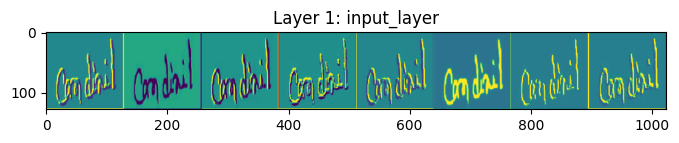

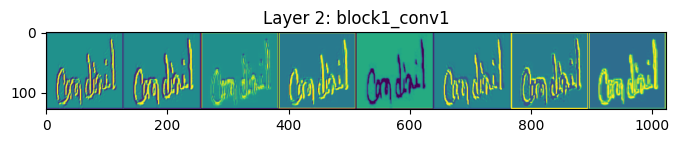

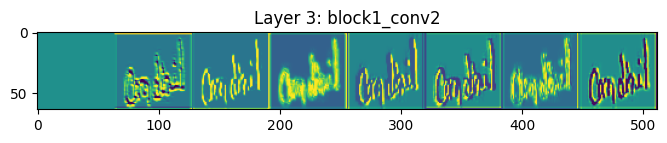

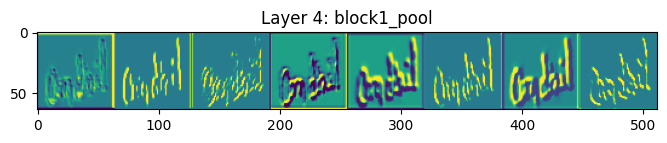

In [ ]:
import random, cv2, numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

img_path = random.choice(os.listdir(test_dir))
img = cv2.imread(os.path.join(test_dir, img_path))     # Read in color (3 channels)
img = cv2.resize(img, (128, 128)) / 255.0              # Match training input size
input_img = np.expand_dims(img, axis=0)                # Shape becomes (1,128,128,3)

print("Image loaded successfully.")
print("Model expects:", model.input_shape)
print("Input shape provided:", input_img.shape)

# Extract feature maps from all convolutional layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(input_img)

#Visualize feature maps for the first few conv layers
for i, feature_map in enumerate(activations[:4]):  # visualize first 4 convolutional layers
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]

    # create grid for visualization
    display_grid = np.zeros((size, size * min(8, n_features)))

    for j in range(min(8, n_features)):  # show up to 8 feature maps
        feature_image = feature_map[0, :, :, j]
        feature_image -= feature_image.mean()
        feature_image /= (feature_image.std() + 1e-5)
        feature_image *= 64
        feature_image += 128
        feature_image = np.clip(feature_image, 0, 255).astype('uint8')
        display_grid[:, j * size:(j + 1) * size] = feature_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(f"Layer {i+1}: {model.layers[i].name}")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()

Checking against sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


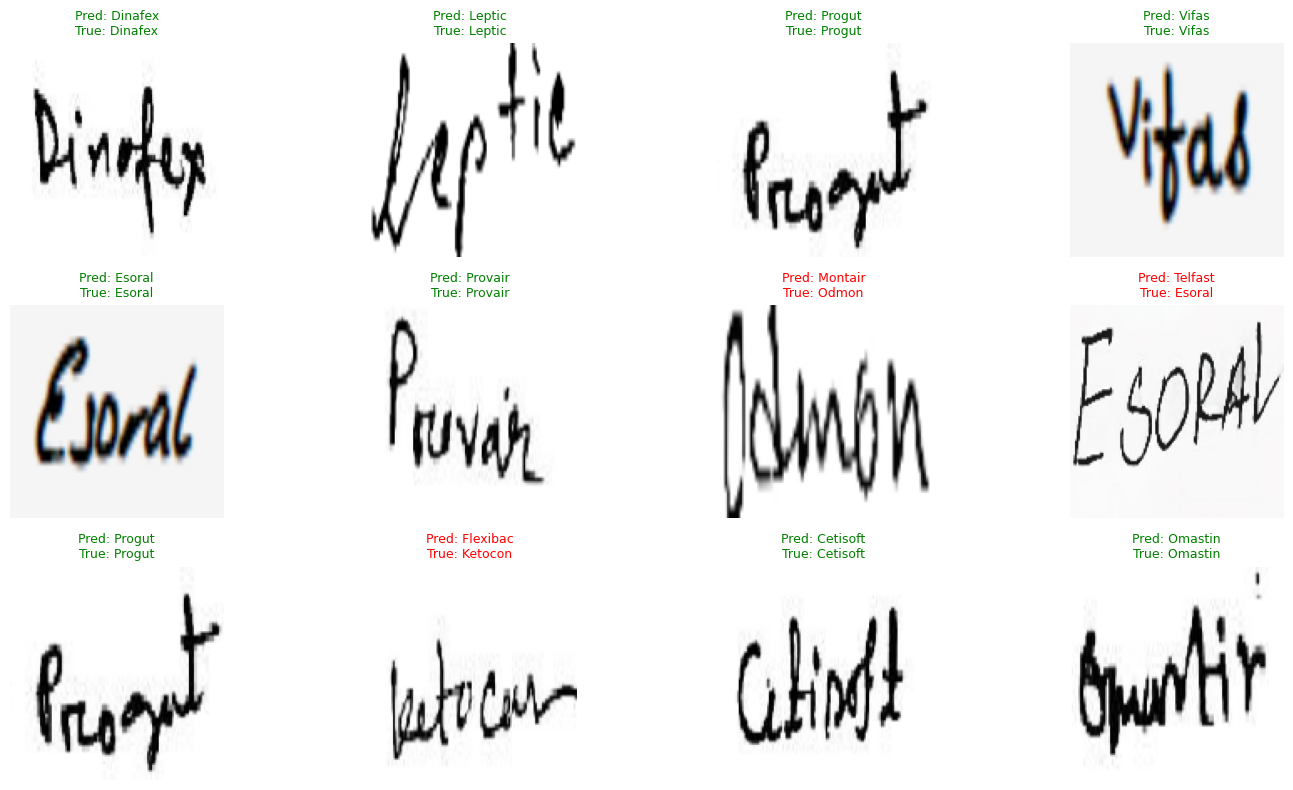

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Get all test images and labels as numpy arrays
all_images = []
all_labels = []

for images, labels in test_ds:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Randomly choose 12 indices
num_samples = 12
indices = np.random.choice(len(all_images), num_samples, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    img = all_images[idx]
    label = all_labels[idx]

    pred = model.predict(img[np.newaxis, ...])
    pred_class = np.argmax(pred, axis=1)[0]
    true_class = np.argmax(label)

    pred_label = idx_to_class[pred_class]
    true_label = idx_to_class[true_class]
    color = "green" if pred_label == true_label else "red"

    ax = plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

Grad-CAM Heatmaps for visualizing regions most responsible for CNN predictions

Image prepared for Grad-CAM: 59.png
Input shape: (1, 128, 128, 3) Expected: (None, 128, 128, 3)


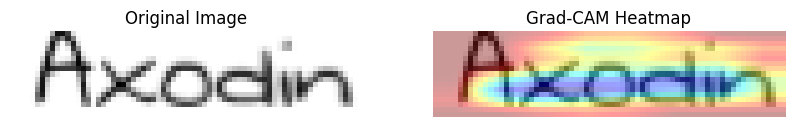

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2, random, os

#Pick a random test image
img_path = random.choice(os.listdir(test_dir))
orig = cv2.imread(os.path.join(test_dir, img_path))
img = cv2.resize(orig, (128, 128)) / 255.0
input_img = np.expand_dims(img, axis=0)   # (1,128,128,3)

print("Image prepared for Grad-CAM:", img_path)
print("Input shape:", input_img.shape, "Expected:", model.input_shape)

#Grad-CAM heatmap generation function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.input],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-10
    return np.array(heatmap)   # return as NumPy array directly

last_conv_layer_name = "block5_conv3"  # replace if different in your model

# Generate heatmap and overlay
heatmap = make_gradcam_heatmap(input_img, model, last_conv_layer_name)
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB), 0.6, heatmap, 0.4, 0)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title("Original Image"); plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.subplot(1,2,2); plt.title("Grad-CAM Heatmap"); plt.imshow(superimposed_img); plt.axis("off")
plt.show()

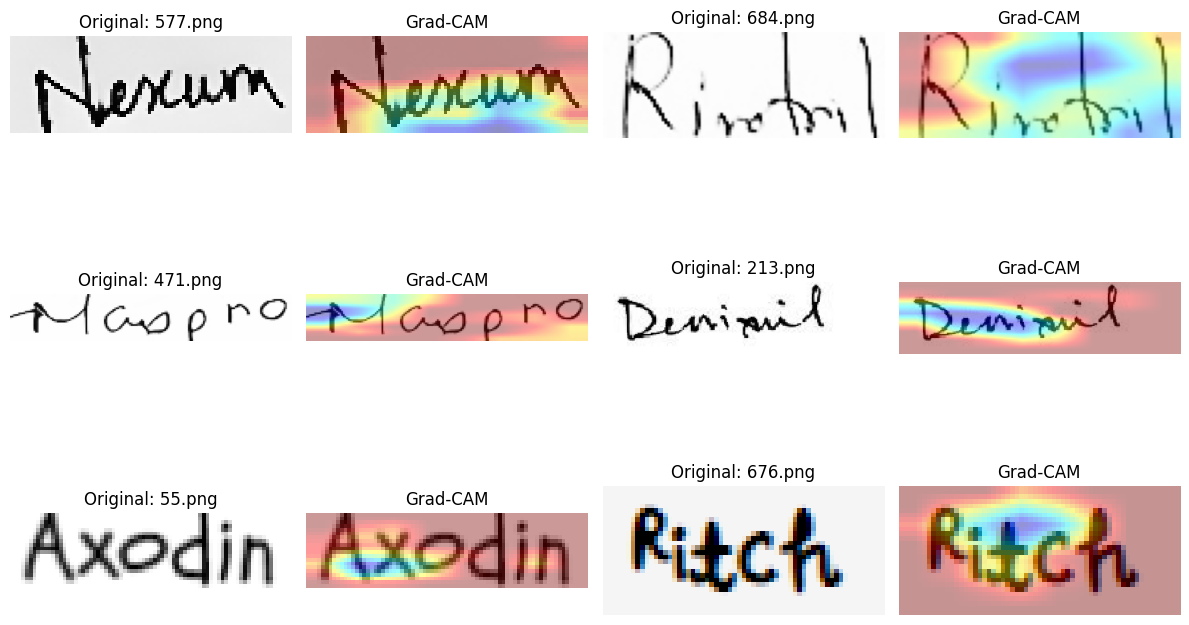

In [ ]:
import matplotlib.pyplot as plt
import cv2, random, os, numpy as np

# pick a few random images from test set
sample_imgs = random.sample(os.listdir(test_dir), 6)

plt.figure(figsize=(12, 8))
for idx, img_path in enumerate(sample_imgs):
    orig = cv2.imread(os.path.join(test_dir, img_path))
    img = cv2.resize(orig, (128, 128)) / 255.0
    input_img = np.expand_dims(img, axis=0)
    heatmap = make_gradcam_heatmap(input_img, model, last_conv_layer_name)
    heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB), 0.6, heatmap, 0.4, 0)

    plt.subplot(3, 4, 2*idx + 1)
    plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    plt.title(f"Original: {img_path}")
    plt.axis("off")

    plt.subplot(3, 4, 2*idx + 2)
    plt.imshow(superimposed)
    plt.title("Grad-CAM")
    plt.axis("off")

plt.tight_layout()
plt.show()

Evaluation metrics

Index(['IMAGE', 'MEDICINE_NAME', 'GENERIC_NAME'], dtype='object')
   IMAGE MEDICINE_NAME GENERIC_NAME
0  0.png         Aceta  Paracetamol
1  1.png         Aceta  Paracetamol
2  2.png         Aceta  Paracetamol
3  3.png         Aceta  Paracetamol
4  4.png         Aceta  Paracetamol
Found 780 validated image filenames belonging to 78 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


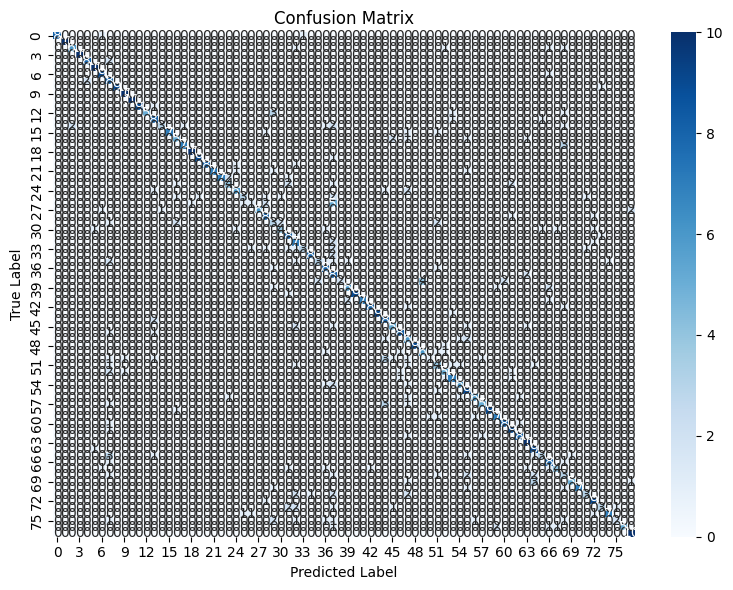


🔍 Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.800     0.889        10
           1      1.000     1.000     1.000        10
           2      0.750     0.600     0.667        10
           3      1.000     1.000     1.000        10
           4      0.800     0.800     0.800        10
           5      0.833     1.000     0.909        10
           6      0.750     0.900     0.818        10
           7      0.296     0.800     0.432        10
           8      1.000     0.900     0.947        10
           9      0.833     1.000     0.909        10
          10      1.000     1.000     1.000        10
          11      1.000     0.900     0.947        10
          12      1.000     0.500     0.667        10
          13      0.533     0.800     0.640        10
          14      0.750     0.300     0.429        10
          15      1.000     0.700     0.824        10
          16      0.500     0.500     0.500        10
 

/tmp/ipython-input-3551158958.py:69: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


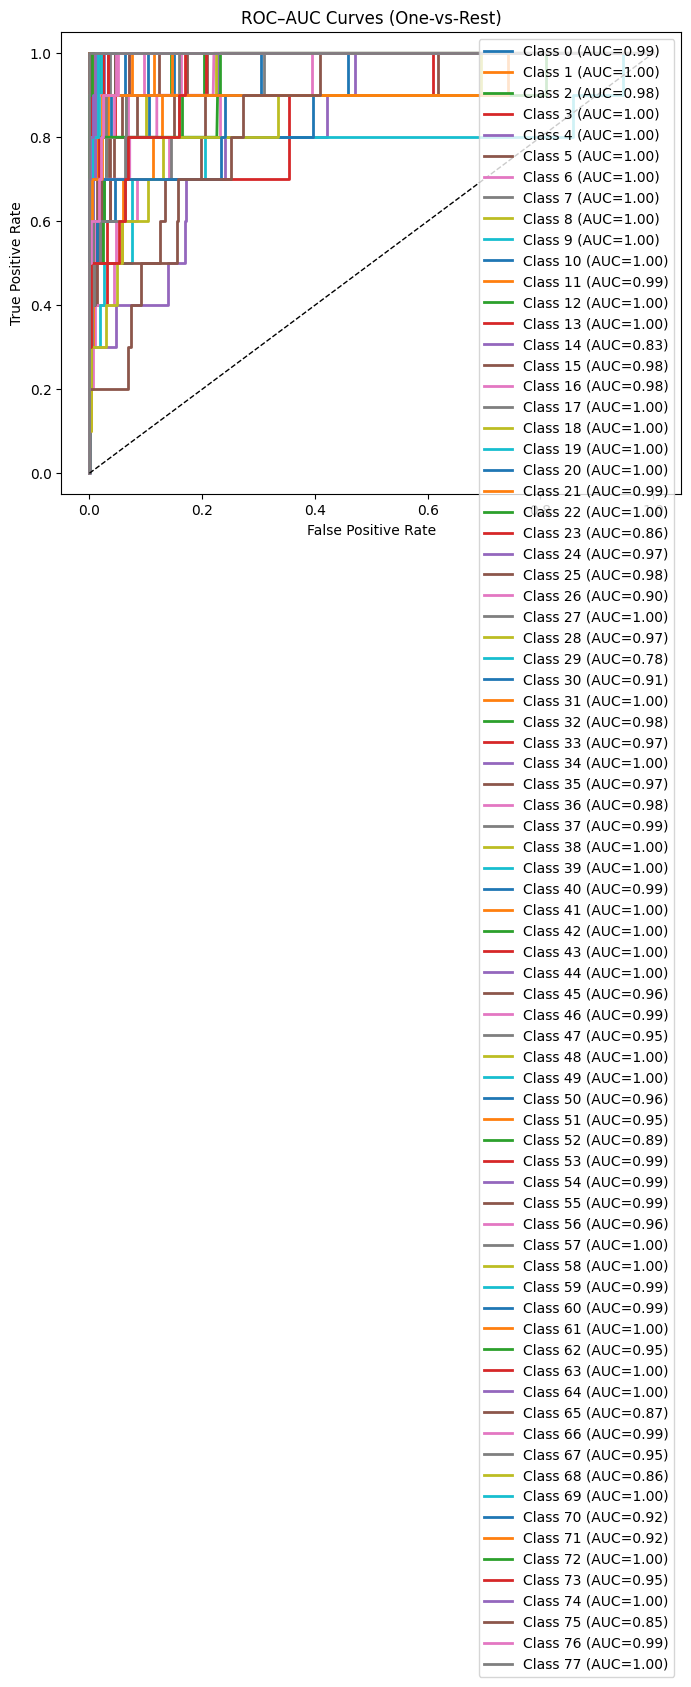


Average AUC across all classes: 0.972
Evaluation complete.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

test_csv = "/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1/Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv"
test_dir = "/root/.cache/kagglehub/datasets/mamun1113/doctors-handwritten-prescription-bd-dataset/versions/1/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words"

import pandas as pd
df = pd.read_csv(test_csv)
print(df.columns)
print(df.head())

datagen = ImageDataGenerator(rescale=1./255)

test_generator = datagen.flow_from_dataframe(
    dataframe=pd.read_csv(test_csv),
    directory=test_dir,
    x_col='IMAGE',
    y_col='MEDICINE_NAME',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

#Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
y_test = tf.keras.utils.to_categorical(y_true)

#Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

#Classification Report
print("\n🔍 Classification Report:")
print(classification_report(y_true, y_pred_classes, digits=3))

#ROC–AUC
n_classes = y_pred.shape[1]
y_test_bin = label_binarize(y_true, classes=range(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC={roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC–AUC Curves (One-vs-Rest)')
plt.legend()
plt.tight_layout()
plt.show()

macro_auc = np.mean(list(roc_auc.values()))
print(f"\nAverage AUC across all classes: {macro_auc:.3f}")
print("Evaluation complete.")